<a href="https://colab.research.google.com/github/FooolyHARD/ognp-sia-lab2-data/blob/main/Konovalov_Arseny_Lab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


> **Все задания выполняются только с использвоанием методов `pandas`.**




# Задание 0 (1 балл)

Данные, которые нужно использовать для выполнения задания, возьмите [здесь](https://www.kaggle.com/parulpandey/palmer-archipelago-antarctica-penguin-data).

Данные расположены в двух таблицах: **penguins_iter** и **penguins_size**. Для этой лабораторной работы вам понадобится только таблица **penguins_size**.

**penguins_size** содержит следующую информацию:
* `species`: вид, к которому относится пингвин
* `culmen_length_mm`: длина клюва
* `culmen_depth_mm`: глубина клюва
* `flipper_length_mm`: длина ласт
* `body_mass_g`: масса тела
* `island`: название острова, на котором пингвин обитает
* `sex`: пол пингвина



1. Загрузите файл с данными к себе на Гугл диск и подключите его в Google Colab через `mount.drive`.
2. Выведите общую статистику по всем числовым и нечисловым столбцам с помощью метода `describe()`.
3. Узнайте размеры датасета с помощью свойство `shape`.
4. Выведите 4 первые строки датасета.

In [2]:
#@title Solution by steps
#Step 1
import pandas as pd
from google.colab import drive
drive.mount('/content/drive/')
a = pd.read_csv(open('/content/drive/MyDrive/penguins_size.csv'))

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [3]:
#Step 2
a.describe(include='all')

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
count,344,344,342.000000,342.000000,342.000000,342.000000,334
unique,3,3,NaN,NaN,NaN,NaN,3
top,Adelie,Biscoe,NaN,NaN,NaN,NaN,MALE
freq,152,168,NaN,NaN,NaN,NaN,168
mean,NaN,NaN,43.921930,17.151170,200.915205,4201.754386,NaN
std,NaN,NaN,5.459584,1.974793,14.061714,801.954536,NaN
min,NaN,NaN,32.100000,13.100000,172.000000,2700.000000,NaN
25%,NaN,NaN,39.225000,15.600000,190.000000,3550.000000,NaN
50%,NaN,NaN,44.450000,17.300000,197.000000,4050.000000,NaN
75%,NaN,NaN,48.500000,18.700000,213.000000,4750.000000,NaN


In [4]:
#step 3
a.shape

(344, 7)

In [5]:
#step 4
a.head(4)

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN


# Задание 1 (1 балл)

1. Узнайте, сколько видов пингвинов представлено в таблице.
2. Посчитайте долю пингвинов каждого вида.
3. Выведите количество пингвинов, обитающих на каждом из островов.

In [6]:
#step 1
value_to_count = "species"
a[value_to_count].nunique()

3

In [7]:
#step 2
is_normalize = True
a[value_to_count].value_counts(normalize=is_normalize)

Adelie       0.441860
Gentoo       0.360465
Chinstrap    0.197674
Name: species, dtype: float64

In [8]:
#step 3
value_to_count = "island"
a[value_to_count].value_counts()

Biscoe       168
Dream        124
Torgersen     52
Name: island, dtype: int64

# Задание 2 (1 балл)

1. Найдите id пингвина с самым длинным клювом и с самым коротким. Выведите всю информацию о каждом из этих пингвинов в виде одной таблицы.
2. Посчитайте, насколько самый длинный клюв длиннее самого короткого.

In [9]:
#step 1
a.loc[[a["culmen_length_mm"].idxmax() , a["culmen_length_mm"].idxmin()]]

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
253,Gentoo,Biscoe,59.6,17.0,230.0,6050.0,MALE
142,Adelie,Dream,32.1,15.5,188.0,3050.0,FEMALE


In [10]:
#step 2
max_length = a["culmen_length_mm"].max()
min_length = a["culmen_length_mm"].min()
print("The difference between max and min length of culmen: " + str(max_length - min_length))

The difference between max and min length of culmen: 27.5


# Задание 3 (1 балл)

1. Постройте корреляционную матрицу для значений столбцов `culmen_length_mm`, `culmen_depth_mm`, `flipper_length_mm`, `body_mass_g`. 
2. Результат покажите на тепловой карте (heatmap). Требуется построить график, а не раскрасить получившуюся в первом пункте таблицу.

In [11]:
#step 1
a.corr()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
culmen_length_mm,1.000000,-0.235053,0.656181,0.595110
culmen_depth_mm,-0.235053,1.000000,-0.583851,-0.471916
flipper_length_mm,0.656181,-0.583851,1.000000,0.871202
body_mass_g,0.595110,-0.471916,0.871202,1.000000


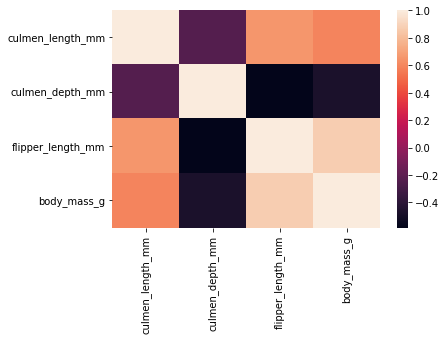

In [12]:
#step 2
import seaborn as sns
sns.heatmap(a.corr())

# Задание 4 (2 балла)

1. О пингвинах какого вида в таблице больше всего недостающих данных? (Строк с `NaN`)
2. Какой информации о пингвинах чаще всего не хватает?

In [13]:
#step 1
value = "species"
species = {}
for i in a[value].unique():
  species[a[a[value] == i].isna().sum().sum()] = i
max = 0
for i in species.keys():
  if i > max:
    max = i
print(species[max])

Adelie


In [14]:
#step 2
print(str(a.isna().sum().idxmax()))

sex


# Задание 5 (2 балла)

1. По данным из таблицы узнайте, равномерно ли демографиески (процент мужских и женских особей) пингвины распределены по каждому из островов. Считаем, что равномерно, если разница составляет не более 3%. Разницу нужно посчитать не между числами, а между процентами.
2. Результат покажите на столбиковой диаграмме.

In [16]:
#step 1
val1= "island"
val2 = "sex"
table = a.groupby(val1)[val2].value_counts(normalize=True).unstack() * 100
print(table)

sex               .     FEMALE       MALE
island                                   
Biscoe     0.609756  48.780488  50.609756
Dream           NaN  49.593496  50.406504
Torgersen       NaN  51.063830  48.936170


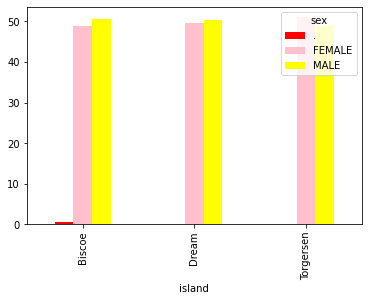

In [19]:
#step 2
table.plot.bar(color=["red", "pink", "yellow"])

# Задание 6 (2 балла)

1. Считая, что длина плавника пингвина составляет треть его роста, рассчитайте индекс массы тела каждого пингвина. Определите самый крупный вид.
2. В каком количестве популяция этого вида представлена на каждом из островов? Результат покажите на круговой диаграмме.

In [20]:
#step 1
weidth = a["body_mass_g"] / 1000
length = a["flipper_length_mm"] * 3 /1000
a["body_mass_index"] = weidth / length ** 2
print(a.groupby("species")["body_mass_index"].mean().idxmax())

The bigest type is: Gentoo


           Gentoo
Dream           0
Torgersen       0
Biscoe        124


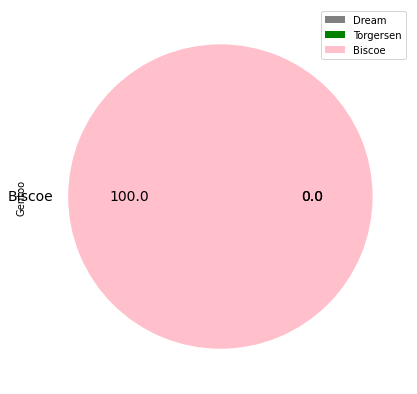

In [23]:
#step 2
islands = set(a.island)
mass = []
for i in islands:
  value = a['species'][(a['species'] == 'Gentoo') & (a['island'] == i)].count()
  mass.append(value)
pop = pd.DataFrame({"Gentoo": mass}, index=islands)
print(pop)
pop.plot.pie(colors=["grey", "g", "pink"],
             y = "Gentoo",
             fontsize = 14,
             autopct="%.1f",
             figsize = (7, 7))